In [1]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt

In [2]:
class_desc = pd.read_csv('../input/class-descriptions.csv')

In [3]:
class_desc.head()

,label_code,description
0,/m/0100nhbf,Sprenger's tulip
1,/m/0104x9kv,Vinegret
2,/m/0105jzwx,Dabu-dabu
3,/m/0105ld7g,Pistachio ice cream
4,/m/0105lxy5,Woku


In [4]:
class_desc.shape

(19987, 2)

In [5]:
label2desc_all = class_desc.set_index('label_code')

In [6]:
label2desc_all.head()

,description
label_code,
/m/0100nhbf,Sprenger's tulip
/m/0104x9kv,Vinegret
/m/0105jzwx,Dabu-dabu
/m/0105ld7g,Pistachio ice cream
/m/0105lxy5,Woku


In [7]:
class_train = pd.read_csv('../input/classes-trainable.csv')

In [8]:
class_train.head()

,label_code
0,/m/0108_09c
1,/m/010dmf
2,/m/010jjr
3,/m/010l12
4,/m/010lq47b


In [9]:
class_train['label_code'].nunique()

7178

In [10]:
class_desc_train = pd.merge(left=class_train, right=class_desc, on='label_code', how='inner')

In [11]:
class_desc_train.shape

(7178, 2)

In [12]:
label2desc_train = class_desc_train.set_index('label_code')

In [13]:
label2desc_train.head()

,description
label_code,
/m/0108_09c,Summer snowflake
/m/010dmf,Isle of man tt
/m/010jjr,Amusement park
/m/010l12,Roller coaster
/m/010lq47b,Witch hat


In [14]:
sub = pd.read_csv('../input/stage_1_sample_submission.csv')

In [15]:
sub.head()

,image_id,labels
0,2b2b327132556c767a736b3d,/m/0sgh53y /m/0g4cd0
1,2b2b394755692f303963553d,/m/0sgh53y /m/0g4cd0
2,2b2b42584e6d445937444d3d,/m/0sgh53y /m/0g4cd0
3,2b2b44744e57674270616f3d,/m/0sgh53y /m/0g4cd0
4,2b2b4b425a592b683059493d,/m/0sgh53y /m/0g4cd0


In [16]:
sub.shape

(32580, 2)

In [17]:
bbox = pd.read_csv('../input/train_bounding_boxes.csv')

In [18]:
bbox.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000002b66c9c498e,xclick,/m/01g317,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0
1,000002b66c9c498e,xclick,/m/01g317,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0
2,000002b66c9c498e,xclick,/m/01g317,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0
3,000002b66c9c498e,xclick,/m/01g317,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0
4,000002b66c9c498e,xclick,/m/01g317,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0


In [19]:
bbox.shape

(14610229, 13)

In [20]:
bbox['LabelName'].nunique()

599

In [21]:
bbox_train = pd.merge(left=bbox, right=class_desc_train, left_on='LabelName', right_on='label_code', how='inner')
bbox_train.drop('LabelName', axis=1, inplace=True)

In [22]:
bbox_train['label_code'].nunique()

553

In [23]:
bbox_train.shape

(12137420, 14)

In [24]:
bbox_train.head()

,ImageID,Source,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,label_code,description
0,000002b66c9c498e,xclick,1,0.012500,0.195312,0.148438,0.587500,0,1,0,0,0,/m/01g317,Person
1,000002b66c9c498e,xclick,1,0.025000,0.276563,0.714063,0.948438,0,1,0,0,0,/m/01g317,Person
2,000002b66c9c498e,xclick,1,0.151562,0.310937,0.198437,0.590625,1,0,0,0,0,/m/01g317,Person
3,000002b66c9c498e,xclick,1,0.256250,0.429688,0.651563,0.925000,1,0,0,0,0,/m/01g317,Person
4,000002b66c9c498e,xclick,1,0.257812,0.346875,0.235938,0.385938,1,0,0,0,0,/m/01g317,Person


In [25]:
bbox_train_ = bbox_train[['ImageID', 'Confidence', 'label_code', 'XMin', 'YMin', 'XMax', 'YMax']]

In [26]:
bbox_train_.reset_index(inplace=True, drop=True)

In [27]:
bbox_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax
0,000002b66c9c498e,1,/m/01g317,0.012500,0.148438,0.195312,0.587500
1,000002b66c9c498e,1,/m/01g317,0.025000,0.714063,0.276563,0.948438
2,000002b66c9c498e,1,/m/01g317,0.151562,0.198437,0.310937,0.590625
3,000002b66c9c498e,1,/m/01g317,0.256250,0.651563,0.429688,0.925000
4,000002b66c9c498e,1,/m/01g317,0.257812,0.235938,0.346875,0.385938


In [28]:
label_hmn = pd.read_csv('../input/train_human_labels.csv')

In [29]:
label_hmn.head()

,ImageID,Source,LabelName,Confidence
0,000002b66c9c498e,crowdsource-verification,/m/01kcnl,1
1,000002b66c9c498e,verification,/m/012mj,1
2,000002b66c9c498e,verification,/m/012yh1,1
3,000002b66c9c498e,verification,/m/014sv8,1
4,000002b66c9c498e,verification,/m/016c68,1


In [30]:
label_hmn['LabelName'].nunique()

18155

In [31]:
label_hmn.shape

(8036466, 4)

In [32]:
label_hmn['ImageID'].nunique()

1743042

In [33]:
label_hmn_train = pd.merge(left=label_hmn, right=class_desc_train, left_on='LabelName', right_on='label_code', how='inner')
label_hmn_train.sort_values(by='ImageID', inplace=True)
label_hmn_train.drop('LabelName', axis=1, inplace=True)

In [34]:
label_hmn_train['label_code'].nunique()

7172

In [35]:
label_hmn_train.shape

(7117742, 5)

In [36]:
label_hmn_train[['ImageID','label_code','description']].drop_duplicates().shape

(7117742, 3)

In [37]:
label_hmn_train['ImageID'].nunique()

1741975

In [38]:
label_hmn_train_ = label_hmn_train[['ImageID', 'Confidence', 'label_code']]
label_hmn_train_['XMin'] = 0
label_hmn_train_['YMin'] = 0
label_hmn_train_['XMax'] = 1
label_hmn_train_['YMax'] = 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
label_hmn_train_.reset_index(inplace=True, drop=True)

In [40]:
label_hmn_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax
0,000002b66c9c498e,1,/m/01kcnl,0,0,1,1
1,000002b66c9c498e,1,/m/0b6w2z,0,0,1,1
2,000002b66c9c498e,1,/m/09q2t,0,0,1,1
3,000002b66c9c498e,1,/m/09j2d,0,0,1,1
4,000002b66c9c498e,1,/m/09g5pq,0,0,1,1


In [41]:
label_hmn_code_train = label_hmn_train.groupby('ImageID')['label_code'].agg(lambda x: ','.join(x)).reset_index()

In [42]:
label_hmn_code_train.shape

(1741975, 2)

In [43]:
label_mch = pd.read_csv('../input/train_machine_labels.csv')

In [44]:
label_mch.head()

,ImageID,Source,LabelName,Confidence
0,000002b66c9c498e,machine,/m/05_4_,0.7
1,000002b66c9c498e,machine,/m/0krfg,0.7
2,000002b66c9c498e,machine,/m/01kcnl,0.5
3,000002b97e5471a0,machine,/m/05_5t0l,0.9
4,000002b97e5471a0,machine,/m/0cgh4,0.8


In [45]:
label_mch['LabelName'].nunique()

7509

In [46]:
label_mch.shape

(15259186, 4)

In [47]:
label_mch['ImageID'].nunique()

1708875

In [48]:
label_mch_train = pd.merge(left=label_mch, right=class_desc_train, left_on='LabelName', right_on='label_code', how='inner')
label_mch_train.drop('LabelName', axis=1, inplace=True)

In [49]:
label_mch_train.loc[label_mch_train.Confidence==1,'label_code'].nunique()

1067

In [50]:
label_mch_train.loc[label_mch_train.Confidence==0.5,'label_code'].nunique()

4167

In [51]:
label_mch_train.shape

(13409172, 5)

In [52]:
label_mch_train[['ImageID','label_code','description']].drop_duplicates().shape

(13409172, 3)

In [53]:
label_mch_train['label_code'].nunique()

4657

In [54]:
label_mch_train['ImageID'].nunique()

1699701

In [55]:
label_mch_train[label_mch_train.Confidence<=0.5].head()

,ImageID,Source,Confidence,label_code,description
7154,000032046c3f8371,machine,0.5,/m/0krfg,Meal
7155,0000615b5a80f660,machine,0.5,/m/0krfg,Meal
7183,0007b8c30150e834,machine,0.5,/m/0krfg,Meal
7187,00089480311a6391,machine,0.5,/m/0krfg,Meal
7191,0009c4db6ea55210,machine,0.5,/m/0krfg,Meal


In [56]:
label_mch_code_train = label_mch_train.groupby('ImageID')['label_code'].agg(lambda x: ','.join(x)).reset_index()

In [57]:
label_mch_code_train.shape

(1699701, 2)

In [58]:
label_hmn_train[~label_hmn_train['label_code'].duplicated()].head()

,ImageID,Source,Confidence,label_code,description
0,000002b66c9c498e,crowdsource-verification,1,/m/01kcnl,Birthday
1957154,000002b66c9c498e,verification,1,/m/0b6w2z,Buttercream
1956772,000002b66c9c498e,verification,1,/m/09q2t,Brown
1345932,000002b66c9c498e,verification,1,/m/09j2d,Clothing
1345432,000002b66c9c498e,verification,1,/m/09g5pq,People


In [59]:
label_hmn_train_set = set([tuple(line) for line in label_hmn_train[['ImageID', 'label_code']].values])
label_mch_train_set = set([tuple(line) for line in label_mch_train[['ImageID', 'label_code']].values])
label_mch_train_diff = pd.DataFrame(list(label_mch_train_set.difference(label_hmn_train_set)))
label_mch_train_diff.rename(columns={0:'ImageID', 1:'label_code'}, inplace=True)

In [60]:
label_mch_train_diff.shape

(11417764, 2)

In [61]:
label_mch_train_diff.head()

,ImageID,label_code
0,42ca47f823a61104,/m/04ggh49
1,a97a5bc46688e9cc,/m/06fvc
2,2f9279e8817d4834,/m/02fm9k
3,d791f1b3bc6b5cc2,/m/03cg49
4,75cb3337004b7be5,/m/020g49


In [62]:
label_mch_train_ = pd.merge(left=label_mch_train_diff, right=label_mch_train[['ImageID', 'Confidence', 'label_code']], on=['ImageID', 'label_code'], how='left')
label_mch_train_['XMin'] = 0
label_mch_train_['YMin'] = 0
label_mch_train_['XMax'] = 1
label_mch_train_['YMax'] = 1
label_mch_train_ = label_mch_train_[['ImageID', 'Confidence', 'label_code', 'XMin', 'YMin', 'XMax', 'YMax']]

In [63]:
label_mch_train_.shape

(11417764, 7)

In [64]:
label_mch_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax
0,42ca47f823a61104,0.6,/m/04ggh49,0,0,1,1
1,a97a5bc46688e9cc,0.9,/m/06fvc,0,0,1,1
2,2f9279e8817d4834,0.7,/m/02fm9k,0,0,1,1
3,d791f1b3bc6b5cc2,0.5,/m/03cg49,0,0,1,1
4,75cb3337004b7be5,0.7,/m/020g49,0,0,1,1


In [65]:
label_hmn_train_set = set([tuple(line) for line in label_hmn_train_.values])
bbox_train_set = set([tuple(line) for line in bbox_train_.values])
label_bbox_train_ = pd.DataFrame(list(bbox_train_set.difference(label_hmn_train_set)))
label_bbox_train_.rename(columns={0:'ImageID', 1:'Confidence', 2:'label_code', 3:'XMin', 4:'YMin', 5:'XMax', 6:'YMax'}, inplace=True)

In [66]:
label_bbox_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax
0,2c4fa270b5971e47,1,/m/09j2d,0.306667,0.805625,0.372500,0.889375
1,7d51db71b4fc5423,1,/m/0199g,0.426061,0.375000,0.610542,0.472656
2,ca5f3777141d2190,1,/m/0k65p,0.270000,0.528243,0.364375,0.776151
3,7827e908eba595fd,1,/m/09j2d,0.000000,0.228333,0.075625,0.780833
4,f80ca2781911da6c,1,/m/07j7r,0.246250,0.393333,0.591250,0.871667


In [67]:
label_bbox_train_.shape

(12135951, 7)

In [68]:
label_hmn_train_['label_code'].nunique()

7172

In [69]:
label_hmn_train_cnt = label_hmn_train_[['ImageID','label_code']].groupby('label_code').count()

In [70]:
label_hmn_train_cnt.sort_values(by='ImageID', ascending=False, inplace=True)

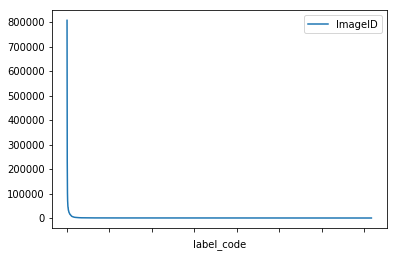

In [71]:
label_hmn_train_cnt.plot()

In [72]:
(label_hmn_train_cnt==1).sum()

ImageID    4
dtype: int64

In [73]:
label_mch_train_['label_code'].nunique()

4561

In [74]:
label_mch_train_cnt = label_mch_train_[['ImageID','label_code']].groupby('label_code').count()

In [75]:
label_mch_train_cnt.sort_values(by='ImageID', ascending=False, inplace=True)

In [76]:
label_mch_train_cnt.head()

,ImageID
label_code,
/m/0jjw,113690
/m/09g5pq,105216
/m/06ntj,83339
/m/0c9ph5,77177
/m/01g6gs,72831


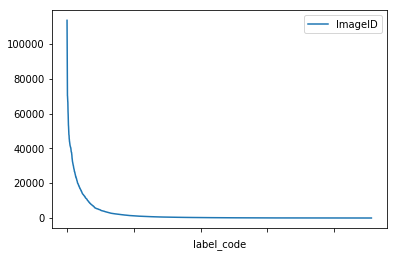

In [77]:
label_mch_train_cnt.plot()

In [78]:
(label_mch_train_cnt==1).sum()

ImageID    100
dtype: int64

In [79]:
label_bbox_train_['label_code'].nunique()

553

In [80]:
label_bbox_train_cnt = label_bbox_train_[['ImageID','label_code']].groupby('label_code').count()

In [81]:
label_bbox_train_cnt.sort_values(by='ImageID', ascending=False, inplace=True)

In [82]:
label_bbox_train_cnt.head()

,ImageID
label_code,
/m/09j2d,1438128
/m/07j7r,1051270
/m/0dzct,1037702
/m/01g317,1034685
/m/09j5n,744473


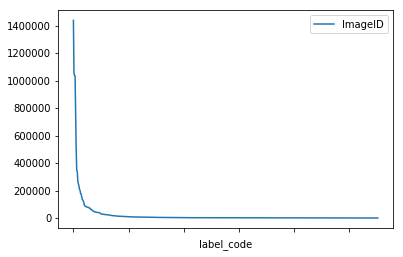

In [83]:
label_bbox_train_cnt.plot()

In [84]:
label_bbox_train_cnt.max(), label_bbox_train_cnt.min()

(ImageID    1438128
 dtype: int64, ImageID    35
 dtype: int64)

In [85]:
label_hmn_train_['source'] = 'human'
label_mch_train_['source'] = 'machine'
label_bbox_train_['source'] = 'bbox'

In [86]:
label_train_ = pd.concat([label_hmn_train_, label_bbox_train_, label_mch_train_])
label_train_ = label_train_.merge(right=class_desc, on='label_code', how='left')
label_train_.reset_index(drop=True, inplace=True)
label_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax,source,description
0,000002b66c9c498e,1.0,/m/01kcnl,0.0,0.0,1.0,1.0,human,Birthday
1,000002b66c9c498e,1.0,/m/0b6w2z,0.0,0.0,1.0,1.0,human,Buttercream
2,000002b66c9c498e,1.0,/m/09q2t,0.0,0.0,1.0,1.0,human,Brown
3,000002b66c9c498e,1.0,/m/09j2d,0.0,0.0,1.0,1.0,human,Clothing
4,000002b66c9c498e,1.0,/m/09g5pq,0.0,0.0,1.0,1.0,human,People


In [87]:
pd.DataFrame({'classes':label_train_['label_code'].unique()}).to_csv('../input/train_images/train_all/classes.csv', index=False)

In [88]:
# label_train_.to_csv('input/label_train.csv', index=False)

In [89]:
label_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax,source,description
0,000002b66c9c498e,1.0,/m/01kcnl,0.0,0.0,1.0,1.0,human,Birthday
1,000002b66c9c498e,1.0,/m/0b6w2z,0.0,0.0,1.0,1.0,human,Buttercream
2,000002b66c9c498e,1.0,/m/09q2t,0.0,0.0,1.0,1.0,human,Brown
3,000002b66c9c498e,1.0,/m/09j2d,0.0,0.0,1.0,1.0,human,Clothing
4,000002b66c9c498e,1.0,/m/09g5pq,0.0,0.0,1.0,1.0,human,People


In [90]:
flag_bbox =  ~((label_train_['XMin']==0.) & (label_train_['YMin']==0.) & (label_train_['XMax']==1.) & (label_train_['YMax']==1.) )

In [91]:
label_train_1 = label_train_.loc[flag_bbox, ['ImageID', 'label_code', 'XMin', 'YMin', 'XMax', 'YMax']]

In [92]:
label_train_1.shape

(12135951, 6)

In [93]:
label_train_1.reset_index(drop=True, inplace=True)

In [94]:
label_train_1['w_bbox'] = 1024*(label_train_1['XMax']-label_train_1['XMin'])
label_train_1['h_bbox'] = 768*(label_train_1['YMax']-label_train_1['YMin'])

In [95]:
((label_train_1['w_bbox']<20)&(label_train_1['h_bbox']<20)).sum()

471742

In [96]:
((label_train_1['w_bbox']<10)|(label_train_1['h_bbox']<10)).sum()

291182

In [97]:
label_train_1.head()

,ImageID,label_code,XMin,YMin,XMax,YMax,w_bbox,h_bbox
0,2c4fa270b5971e47,/m/09j2d,0.306667,0.805625,0.372500,0.889375,67.412992,64.320000
1,7d51db71b4fc5423,/m/0199g,0.426061,0.375000,0.610542,0.472656,188.908544,74.999808
2,ca5f3777141d2190,/m/0k65p,0.270000,0.528243,0.364375,0.776151,96.640000,190.393344
3,7827e908eba595fd,/m/09j2d,0.000000,0.228333,0.075625,0.780833,77.440000,424.320000
4,f80ca2781911da6c,/m/07j7r,0.246250,0.393333,0.591250,0.871667,353.280000,367.360512


In [98]:
label_train_1.drop(index=label_train_1.index[ ((label_train_1['w_bbox']<20)&(label_train_1['h_bbox']<20)) |
                                              ((label_train_1['w_bbox']<10)|(label_train_1['h_bbox']<10)) ], inplace=True)
label_train_1.reset_index(inplace=True, drop=True)

In [99]:
label_train_1.shape

(11576529, 8)

In [100]:
from sklearn.model_selection import StratifiedShuffleSplit as SSS

In [101]:
sss = SSS(n_splits=1, test_size=50000./label_train_1.shape[0], random_state=42)
label_bbox_train_test_idx = sss.split(np.zeros(label_train_1.shape[0]), label_train_1['label_code'])
label_bbox_train_idx, label_bbox_test_idx = next(label_bbox_train_test_idx)

In [102]:
label_bbox_test_idx.shape

(50000,)

In [103]:
label_train_1['label_code'].nunique()

553

In [104]:
label_train_1.loc[label_bbox_test_idx, 'label_code'].nunique()

544

In [105]:
label_train_1.loc[label_bbox_train_idx, 'label_code'].nunique()

553

In [106]:
label_train_1.loc[7943065,:]

ImageID       875794bc2c8c4be6
label_code            /m/09j2d
XMin                    0.4975
YMin                      0.47
XMax                  0.554375
YMax                  0.549167
w_bbox                   58.24
h_bbox                 60.8003
Name: 7943065, dtype: object

In [107]:
label_bbox_train = label_train_1.loc[label_bbox_train_idx, :].reset_index(drop=True)
label_bbox_test = label_train_1.loc[label_bbox_test_idx, :].reset_index(drop=True)

In [108]:
label_bbox_train.head()

,ImageID,label_code,XMin,YMin,XMax,YMax,w_bbox,h_bbox
0,2ef29be9adc3d294,/m/09j5n,0.081875,0.655722,0.115000,0.707317,33.920000,39.624960
1,d3e0a2a04b125bf6,/m/04rky,0.425000,0.245000,0.451875,0.369167,27.520000,95.360256
2,a6a339aa0061d196,/m/01g317,0.249375,0.198670,0.425625,0.999169,180.480000,614.783232
3,0e050b9c776da380,/m/05s2s,0.000000,0.551929,0.997778,0.997033,1021.724672,341.839872
4,77b7e04ae589939e,/m/09j2d,0.689375,0.377715,0.784375,0.514636,97.280000,105.155328


In [109]:
label_bbox_train_cnt = label_bbox_train[['ImageID','label_code']].groupby('label_code').count()

In [110]:
label_bbox_train_cnt.sort_values(by='ImageID', ascending=False, inplace=True)

In [111]:
label_bbox_train_cnt.head()

,ImageID
label_code,
/m/09j2d,1409033
/m/07j7r,1030940
/m/01g317,1005692
/m/0dzct,987291
/m/09j5n,623902


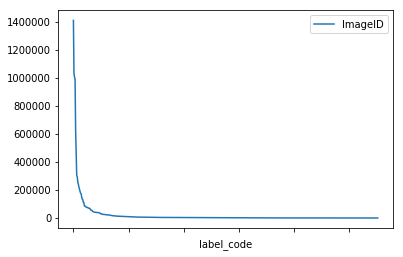

In [112]:
label_bbox_train_cnt.plot()

In [113]:
label_bbox_train_cnt.max()

ImageID    1409033
dtype: int64

In [114]:
label_bbox_train_cnt.min()

ImageID    35
dtype: int64

In [115]:
label_bbox_train_cnt.iloc[287]

ImageID    1417
Name: /m/01nq26, dtype: int64

In [116]:
label_bbox_train_cnt['ratio_max'] = label_bbox_train_cnt['ImageID'].max() / label_bbox_train_cnt['ImageID']

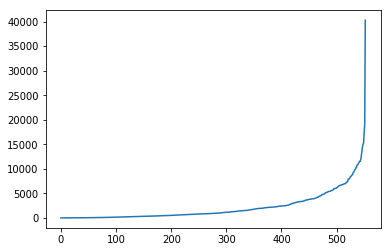

In [117]:
plt.plot(list(map(lambda x: [x], np.arange(label_bbox_train_cnt.shape[0]))), label_bbox_train_cnt['ratio_max'])

In [118]:
def curvature(x):
    d1 = np.diff(x)
    d2 = np.diff(d1)
    return abs(d2)*(1 + d1[:-1]**2)**-1.5

In [119]:
c = curvature(label_bbox_train_cnt['ImageID'])

In [120]:
c.argmax()

117

In [121]:
label_bbox_train_cnt.iloc[73]

ImageID      16175.000000
ratio_max       87.111777
Name: /m/0zvk5, dtype: float64

In [122]:
from sklearn.linear_model import LinearRegression as LR

In [123]:
X = list(map(lambda x: [x], np.arange(label_bbox_train_cnt.shape[0])))
reg = LR().fit(X, label_bbox_train_cnt['ratio_max'])
y = reg.predict(X)

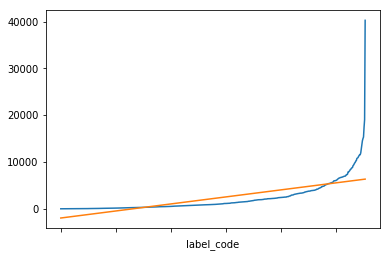

In [124]:
label_bbox_train_cnt['ratio_max'].plot()
plt.plot(X, y)

In [125]:
(label_bbox_train_cnt['ImageID']<100).sum()

6

In [126]:
(label_bbox_train_cnt['ratio_max']>10000).sum()

18

In [127]:
label_bbox_train_cnt.iloc[-7:,:]

,ImageID,ratio_max
label_code,,
/m/065h6l,103,13679.932039
/m/03jbxj,97,14526.113402
/m/02ctlc,94,14989.712766
/m/0ky7b,92,15315.576087
/m/074d1,81,17395.469136
/m/07v9_z,74,19040.986486
/m/03qhv5,35,40258.085714


In [128]:
label_bbox_train_cnt.head()

,ImageID,ratio_max
label_code,,
/m/09j2d,1409033,1.000000
/m/07j7r,1030940,1.366746
/m/01g317,1005692,1.401058
/m/0dzct,987291,1.427171
/m/09j5n,623902,2.258420


In [129]:
num_sample_min = 600
num_sample_max = 6000
label_bbox_train_cnt['weight_class'] = -(num_sample_max-num_sample_min)/label_bbox_train_cnt.shape[0] * np.arange(label_bbox_train_cnt.shape[0]) + num_sample_max
label_bbox_train_cnt['weight_class'] = label_bbox_train_cnt['weight_class'].map(lambda x: int(x))

# weight to feed to loss
num_sample_min = 100
num_sample_max = 1
label_bbox_train_cnt['weight_class_'] = -(num_sample_max-num_sample_min)/label_bbox_train_cnt.shape[0] * np.arange(label_bbox_train_cnt.shape[0]) + num_sample_max

# label_bbox_train_cnt['weight_class'] = label_bbox_train_cnt['ImageID']
# label_bbox_train_cnt.loc[label_bbox_train_cnt['ImageID']<=1000, 'weight_class'] = 1000
# label_bbox_train_cnt.loc[label_bbox_train_cnt['ImageID']>=10000, 'weight_class'] = 10000

In [130]:
label_bbox_train_cnt.head()

,ImageID,ratio_max,weight_class,weight_class_
label_code,,,,
/m/09j2d,1409033,1.000000,6000,1.000000
/m/07j7r,1030940,1.366746,5990,1.179024
/m/01g317,1005692,1.401058,5980,1.358047
/m/0dzct,987291,1.427171,5970,1.537071
/m/09j5n,623902,2.258420,5960,1.716094


In [131]:
label_bbox_train_cnt['weight_class'].sum()

1827324

In [132]:
label_bbox_train_cnt.reset_index(inplace=True, drop=False)

In [133]:
label_bbox_train_cnt.shape

(553, 5)

In [134]:
label_bbox_train_cnt.iloc[-3:,0]

550     /m/074d1
551    /m/07v9_z
552    /m/03qhv5
Name: label_code, dtype: object

In [135]:
label_bbox_train_cnt.iloc[-3:,:]

,label_code,ImageID,ratio_max,weight_class,weight_class_
550,/m/074d1,81,17395.469136,629,99.462929
551,/m/07v9_z,74,19040.986486,619,99.641953
552,/m/03qhv5,35,40258.085714,609,99.820976


In [136]:
# label_bbox_train.drop(columns='weight_class', inplace=True)

In [137]:
label_bbox_train.head()

,ImageID,label_code,XMin,YMin,XMax,YMax,w_bbox,h_bbox
0,2ef29be9adc3d294,/m/09j5n,0.081875,0.655722,0.115000,0.707317,33.920000,39.624960
1,d3e0a2a04b125bf6,/m/04rky,0.425000,0.245000,0.451875,0.369167,27.520000,95.360256
2,a6a339aa0061d196,/m/01g317,0.249375,0.198670,0.425625,0.999169,180.480000,614.783232
3,0e050b9c776da380,/m/05s2s,0.000000,0.551929,0.997778,0.997033,1021.724672,341.839872
4,77b7e04ae589939e,/m/09j2d,0.689375,0.377715,0.784375,0.514636,97.280000,105.155328


In [138]:
label_bbox_train = pd.merge(left=label_bbox_train[['ImageID', 'label_code', 'XMin', 'YMin', 'XMax', 'YMax']], 
                            right=label_bbox_train_cnt[['label_code', 'weight_class']], 
                            on='label_code', how='left')

In [139]:
label_bbox_train.shape

(11526529, 7)

In [140]:
label_bbox_train.head()

,ImageID,label_code,XMin,YMin,XMax,YMax,weight_class
0,2ef29be9adc3d294,/m/09j5n,0.081875,0.655722,0.115000,0.707317,5960
1,d3e0a2a04b125bf6,/m/04rky,0.425000,0.245000,0.451875,0.369167,5853
2,a6a339aa0061d196,/m/01g317,0.249375,0.198670,0.425625,0.999169,5980
3,0e050b9c776da380,/m/05s2s,0.000000,0.551929,0.997778,0.997033,5921
4,77b7e04ae589939e,/m/09j2d,0.689375,0.377715,0.784375,0.514636,6000


In [141]:
# label_bbox_train.to_csv('input/label_bbox_train.csv', index=False)

In [142]:
class_desc_train.head()

,label_code,description
0,/m/0108_09c,Summer snowflake
1,/m/010dmf,Isle of man tt
2,/m/010jjr,Amusement park
3,/m/010l12,Roller coaster
4,/m/010lq47b,Witch hat


In [143]:
label_bbox_desc = label_bbox_train[['label_code','ImageID']].drop_duplicates(subset='label_code')
label_bbox_desc = label_bbox_desc.merge(right=class_desc_train, on='label_code', how='left').drop(columns='ImageID')

In [144]:
label_bbox_desc = label_bbox_desc.merge(right=label_bbox_train_cnt[['label_code', 'weight_class_']], on='label_code', how='left')

In [145]:
label_bbox_desc.head()

,label_code,description,weight_class_
0,/m/09j5n,Footwear,1.716094
1,/m/04rky,Mammal,3.685353
2,/m/01g317,Person,1.358047
3,/m/05s2s,Plant,2.432188
4,/m/09j2d,Clothing,1.000000


In [146]:
label_bbox_desc.shape

(553, 3)

In [147]:
# label_bbox_desc.to_csv('input/label_bbox_desc.csv', index=False)

In [148]:
label_bbox_test['weight_class'] = 0

In [149]:
label_bbox_test.head()

,ImageID,label_code,XMin,YMin,XMax,YMax,w_bbox,h_bbox,weight_class
0,2695ac46fb0a0f9f,/m/04brg2,0.508750,0.640833,0.734375,0.744167,231.040000,79.360512,0
1,36e3331f700a77b8,/m/08pbxl,0.003750,0.272983,0.647500,0.986867,659.200000,548.262912,0
2,8383969c462eb13c,/m/0d4v4,0.640625,0.480234,0.650391,0.546120,10.000384,50.600448,0
3,0fb1e7478e12ab68,/m/0dzct,0.473750,0.137899,0.577500,0.313321,106.240000,134.724096,0
4,319e1ab5517abbfb,/m/09j5n,0.416016,0.869565,0.465820,0.898551,50.999296,22.261248,0


In [150]:
# label_bbox_test[['ImageID', 'label_code', 'XMin', 'YMin', 'XMax', 'YMax', 'weight_class']].to_csv('input/label_bbox_valid.csv', index=False)

In [151]:
# label_bbox_test.sample(frac=0.1).to_csv('input/label_bbox_valid_01.csv', index=False)

In [152]:
label_train_.head()

,ImageID,Confidence,label_code,XMin,YMin,XMax,YMax,source,description
0,000002b66c9c498e,1.0,/m/01kcnl,0.0,0.0,1.0,1.0,human,Birthday
1,000002b66c9c498e,1.0,/m/0b6w2z,0.0,0.0,1.0,1.0,human,Buttercream
2,000002b66c9c498e,1.0,/m/09q2t,0.0,0.0,1.0,1.0,human,Brown
3,000002b66c9c498e,1.0,/m/09j2d,0.0,0.0,1.0,1.0,human,Clothing
4,000002b66c9c498e,1.0,/m/09g5pq,0.0,0.0,1.0,1.0,human,People


In [153]:
label_train_0_ = label_train_.loc[~flag_bbox, :]

In [154]:
label_train_0_.shape

(18535506, 9)

In [155]:
label_train_0_cnt = label_train_0_[['ImageID', 'label_code']].groupby('label_code').count().sort_values(by='ImageID', ascending=False)

In [156]:
label_train_0_cnt.head()

,ImageID
label_code,
/m/01g317,813340
/m/09j2d,617387
/m/0dzct,334534
/m/07j7r,332999
/m/05s2s,308986


In [157]:
label_train_0_cnt.iloc[-2809,:]

ImageID    99
Name: /m/01_3kg, dtype: int64

In [158]:
(label_train_0_cnt['ImageID']<100).sum()

2809

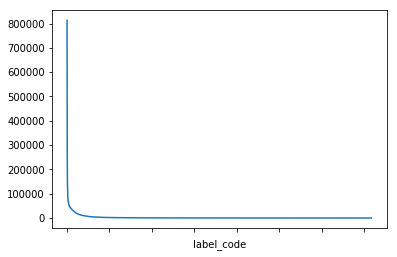

In [159]:
label_train_0_cnt['ImageID'].plot()

In [160]:
num_sample_min = 30
num_sample_max = 4000
label_train_0_cnt['weight_class'] = -(num_sample_max-num_sample_min)/label_train_0_cnt.shape[0] * np.arange(label_train_0_cnt.shape[0]) + num_sample_max
label_train_0_cnt['weight_class'] = label_train_0_cnt['weight_class']#.map(lambda x: int(x))

# weight to feed to loss
num_sample_min = 100
num_sample_max = 1
label_train_0_cnt['weight_class_'] = -(num_sample_max-num_sample_min)/label_train_0_cnt.shape[0] * np.arange(label_train_0_cnt.shape[0]) + num_sample_max


In [161]:
label_train_0_cnt['weight_class'].sum()

14455580.0

In [162]:
label_train_0_cnt.reset_index(inplace=True, drop=False)

In [163]:
label_train_0_cnt.shape

(7173, 4)

In [164]:
label_train_0_cnt.head(10)

,label_code,ImageID,weight_class,weight_class_
0,/m/01g317,813340,4000.000000,1.000000
1,/m/09j2d,617387,3999.446536,1.013802
2,/m/0dzct,334534,3998.893071,1.027604
3,/m/07j7r,332999,3998.339607,1.041405
4,/m/05s2s,308986,3997.786142,1.055207
5,/m/07yv9,262845,3997.232678,1.069009
6,/m/0cgh4,200383,3996.679214,1.082811
7,/m/01prls,169157,3996.125749,1.096612
8,/m/0c9ph5,156023,3995.572285,1.110414
9,/m/0jbk,147780,3995.018821,1.124216


In [165]:
label_train_0_cnt['ImageID'].sum()

18535506

In [166]:
(label_train_0_cnt['ImageID']<1000).sum()

5755

In [167]:
label_train_0_ = pd.merge(left=label_train_0_[['ImageID', 'label_code',]], 
                            right=label_train_0_cnt[['label_code', 'weight_class']], 
                            on='label_code', how='left')

In [168]:
label_train_0_.head()

,ImageID,label_code,weight_class
0,000002b66c9c498e,/m/01kcnl,3253.930015
1,000002b66c9c498e,/m/0b6w2z,3578.260142
2,000002b66c9c498e,/m/09q2t,3781.381570
3,000002b66c9c498e,/m/09j2d,3999.446536
4,000002b66c9c498e,/m/09g5pq,3992.251499


In [169]:
label_train_0_[['ImageID', 'weight_class']].groupby('ImageID').max()['weight_class'].unique().sum()

2618311.456852084

In [170]:
label_train_0_[['ImageID', 'weight_class']].groupby('ImageID').max().shape

(1742996, 1)

In [171]:
label_train_0_[['ImageID', 'weight_class']].groupby('ImageID').max()['weight_class'].nunique()

739

In [172]:
label_train_0 = label_train_0_.groupby('ImageID').agg({'label_code': lambda x: [i for i in x]})
label_train_0['weight_class'] = label_train_0_.groupby('ImageID').agg({'weight_class': lambda x: np.max(x)})

In [173]:
label_train_0.head()

,label_code,weight_class
ImageID,,
000002b66c9c498e,"[/m/01kcnl, /m/0b6w2z, /m/09q2t, /m/09j2d, /m/...",4000.000000
000002b97e5471a0,"[/m/02q7ylj, /m/023907r, /m/025rw19, /m/026y56...",3996.679214
000002c707c9895e,"[/m/037p5b, /m/036jvk, /m/01mrgs, /m/081pkj, /...",4000.000000
0000048549557964,"[/m/012yh1, /m/01prls, /m/0h8pb3l, /m/01lrnl, ...",3998.339607
000004f4400f6ec5,"[/m/04rky, /m/03f52z, /m/032tl, /m/06wqb, /m/0...",4000.000000


In [174]:
label_train_0['weight_class'].min(), label_train_0['weight_class'].sum()

(1212.1999163529904, 6962749916.7057)

In [175]:
label_train_0['label_code'] = label_train_0['label_code'].map(lambda x: ','.join(x))
label_train_0.reset_index(inplace=True, drop=False)

In [176]:
label_train_0.head()

,ImageID,label_code,weight_class
0,000002b66c9c498e,"/m/01kcnl,/m/0b6w2z,/m/09q2t,/m/09j2d,/m/09g5p...",4000.000000
1,000002b97e5471a0,"/m/02q7ylj,/m/023907r,/m/025rw19,/m/026y56,/m/...",3996.679214
2,000002c707c9895e,"/m/037p5b,/m/036jvk,/m/01mrgs,/m/081pkj,/m/035...",4000.000000
3,0000048549557964,"/m/012yh1,/m/01prls,/m/0h8pb3l,/m/01lrnl,/m/0j...",3998.339607
4,000004f4400f6ec5,"/m/04rky,/m/03f52z,/m/032tl,/m/06wqb,/m/0dgw9r...",4000.000000


In [177]:
label_train_0.shape

(1742996, 3)

In [178]:
label_train_0_val = label_train_0.sample(n=50000, random_state=42)

In [179]:
label_train_0_val.head()

,ImageID,label_code,weight_class
1076645,97c9452de2fc4934,"/m/0d4v4,/m/0cgh4,/m/01l7t2,/m/0180xr,/m/05wrt...",3996.679214
892785,7bcae5999e0dda75,"/m/0jbk,/m/01lrl,/m/0bt9lr,/m/017y8_,/m/04rky,...",3995.018821
634319,54f108c3ede08d4f,"/m/0f4s2w,/m/02xwb,/m/02wbm,/m/05s2s,/m/01ww8y...",3997.786142
473840,3d0af76d0bf14c1c,"/m/0b3yr,/m/01bqk0,/m/01g317,/m/09d_r,/m/05y5l...",4000.000000
363123,2cdedadfc2167444,"/m/035r7c,/m/09j2d,/m/0463sg,/m/02p0tk3,/m/0k6...",4000.000000


In [180]:
label_train_0_trn = label_train_0.loc[label_train_0.index.difference(label_train_0_val.index), :]

In [181]:
label_train_0_trn.shape

(1692996, 3)

In [182]:
label_train_0_trn.head()

,ImageID,label_code,weight_class
0,000002b66c9c498e,"/m/01kcnl,/m/0b6w2z,/m/09q2t,/m/09j2d,/m/09g5p...",4000.000000
1,000002b97e5471a0,"/m/02q7ylj,/m/023907r,/m/025rw19,/m/026y56,/m/...",3996.679214
2,000002c707c9895e,"/m/037p5b,/m/036jvk,/m/01mrgs,/m/081pkj,/m/035...",4000.000000
3,0000048549557964,"/m/012yh1,/m/01prls,/m/0h8pb3l,/m/01lrnl,/m/0j...",3998.339607
4,000004f4400f6ec5,"/m/04rky,/m/03f52z,/m/032tl,/m/06wqb,/m/0dgw9r...",4000.000000


In [183]:
label_train_0_trn['weight_class'].unique().sum()

2595743.7097448767

In [184]:
label_train_0_trn.reset_index(inplace=True, drop=True)
label_train_0_val.reset_index(inplace=True, drop=True)

In [185]:
# label_train_0_trn['weight_class'] = label_train_0_trn['weight_class'].map(lambda x: int(x))
# label_train_0_val['weight_class'] = label_train_0_val['weight_class'].map(lambda x: int(x))

In [186]:
label_train_0_trn.head()

,ImageID,label_code,weight_class
0,000002b66c9c498e,"/m/01kcnl,/m/0b6w2z,/m/09q2t,/m/09j2d,/m/09g5p...",4000.000000
1,000002b97e5471a0,"/m/02q7ylj,/m/023907r,/m/025rw19,/m/026y56,/m/...",3996.679214
2,000002c707c9895e,"/m/037p5b,/m/036jvk,/m/01mrgs,/m/081pkj,/m/035...",4000.000000
3,0000048549557964,"/m/012yh1,/m/01prls,/m/0h8pb3l,/m/01lrnl,/m/0j...",3998.339607
4,000004f4400f6ec5,"/m/04rky,/m/03f52z,/m/032tl,/m/06wqb,/m/0dgw9r...",4000.000000


In [187]:
# label_train_0_trn[['ImageID', 'label_code', 'weight_class']].to_csv('input/label_hmn_mch_train.csv', index=False)
# label_train_0_val[['ImageID', 'label_code', 'weight_class']].to_csv('input/label_hmn_mch_valid.csv', index=False)

In [188]:
class_desc_train.head()

,label_code,description
0,/m/0108_09c,Summer snowflake
1,/m/010dmf,Isle of man tt
2,/m/010jjr,Amusement park
3,/m/010l12,Roller coaster
4,/m/010lq47b,Witch hat


In [189]:
label_train_0_cnt.shape

(7173, 4)

In [190]:
label_desc_0 = class_desc_train.merge(right=label_train_0_cnt[['label_code', 'weight_class_']], on='label_code', how='right')

In [191]:
label_desc_0.head()

,label_code,description,weight_class_
0,/m/0108_09c,Summer snowflake,87.675031
1,/m/010dmf,Isle of man tt,47.829360
2,/m/010jjr,Amusement park,8.204517
3,/m/010l12,Roller coaster,33.613551
4,/m/010lq47b,Witch hat,91.981179


In [192]:
label_desc_0.shape

(7173, 3)

In [193]:
# label_desc_0.to_csv('input/label_hmn_mch_desc.csv', index=False)

In [194]:
label_train_01 = pd.concat([label_train_0, label_train_1]).reset_index(inplace=False, drop=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [195]:
label_train_01.shape

(13319525, 9)

In [196]:
label_train_01.head()

,ImageID,XMax,XMin,YMax,YMin,h_bbox,label_code,w_bbox,weight_class
0,000002b66c9c498e,NaN,NaN,NaN,NaN,NaN,"/m/01kcnl,/m/0b6w2z,/m/09q2t,/m/09j2d,/m/09g5p...",NaN,4000.000000
1,000002b97e5471a0,NaN,NaN,NaN,NaN,NaN,"/m/02q7ylj,/m/023907r,/m/025rw19,/m/026y56,/m/...",NaN,3996.679214
2,000002c707c9895e,NaN,NaN,NaN,NaN,NaN,"/m/037p5b,/m/036jvk,/m/01mrgs,/m/081pkj,/m/035...",NaN,4000.000000
3,0000048549557964,NaN,NaN,NaN,NaN,NaN,"/m/012yh1,/m/01prls,/m/0h8pb3l,/m/01lrnl,/m/0j...",NaN,3998.339607
4,000004f4400f6ec5,NaN,NaN,NaN,NaN,NaN,"/m/04rky,/m/03f52z,/m/032tl,/m/06wqb,/m/0dgw9r...",NaN,4000.000000


In [197]:
label_train_test = label_train_.loc[~flag_bbox, ['ImageID', 'label_code']]

In [198]:
label_train_test.head()

,ImageID,label_code
0,000002b66c9c498e,/m/01kcnl
1,000002b66c9c498e,/m/0b6w2z
2,000002b66c9c498e,/m/09q2t
3,000002b66c9c498e,/m/09j2d
4,000002b66c9c498e,/m/09g5pq


In [199]:
from sklearn.model_selection import StratifiedShuffleSplit as SSS

In [200]:
sss = SSS(n_splits=20, test_size=0.005, random_state=42)

In [201]:
label_train_test.shape

(18535506, 2)

In [202]:
# label_train_cnt.index[label_train_cnt['ImageID']==1]
onesample = ['/m/0266h', '/m/0cvt8m', '/m/05q3k']
label_train_test.drop(inplace=True, index=label_train_test.index[ [i in onesample for i in label_train_test['label_code']] ])

In [203]:
label_train_test.reset_index(inplace=True, drop=True)

In [204]:
label_train_test.shape

(18535503, 2)

In [205]:
indices = sss.split(np.zeros([label_train_test.shape[0],1]),label_train_test['label_code'])

In [206]:
train_index, test_index = next(indices)

In [207]:
train_index.shape

(18442825,)

In [208]:
test_index.shape

(92678,)

In [209]:
label_train_test['label_code'].nunique()

7170

In [210]:
label_train_test.loc[train_index,'label_code'].nunique()

7170

In [211]:
label_train_test.loc[test_index,'label_code'].nunique()

4643

In [212]:
label_train_00 = label_train_test.loc[train_index, :].groupby('ImageID').agg({'label_code': lambda x: [i for i in x]})

In [213]:
label_train_00.shape

(1742979, 1)

In [214]:
label_test = label_train_test.loc[test_index, :].groupby('ImageID').agg({'label_code': lambda x: [i for i in x]})

In [215]:
label_test.shape

(90074, 1)

In [216]:
label_train_00['XMin'] = 0.
label_train_00['YMin'] = 0.
label_train_00['XMax'] = 1.
label_train_00['YMax'] = 1.
# label_train_00['description'] = label_train_00['label_code'].map(lambda x: [label2desc_train.loc[i, 'description'] for i in x])
label_train_00['label_code'] = label_train_00['label_code'].map(lambda x: ','.join(x))
label_train_00.reset_index(inplace=True, drop=False)

In [217]:
label_test['XMin'] = 0.
label_test['YMin'] = 0.
label_test['XMax'] = 1.
label_test['YMax'] = 1.
# label_test['description'] = label_test['label_code'].map(lambda x: [label2desc_train.loc[i, 'description'] for i in x])
label_test['label_code'] = label_test['label_code'].map(lambda x: ','.join(x))
label_test.reset_index(inplace=True, drop=False)

In [218]:
# label_train_01.to_csv('input/label_train_01.csv', index=False)

In [219]:
label_train_labelclass = pd.DataFrame({'label_code':label_train_['label_code'].unique()})

In [220]:
label_train_labelclass['description'] = label_train_labelclass['label_code'].map(lambda x: label2desc_train.loc[x, 'description'])

In [221]:
label_train_labelclass.head()

,label_code,description
0,/m/01kcnl,Birthday
1,/m/0b6w2z,Buttercream
2,/m/09q2t,Brown
3,/m/09j2d,Clothing
4,/m/09g5pq,People


In [222]:
label_train_labelclass.shape

(7173, 2)

In [223]:
# label_train_labelclass.to_csv('input/label_desc.csv', index=False)

In [224]:
label_train_.shape

(30671457, 9)

In [225]:
label_train_['ImageID'].nunique()

1742996

In [226]:
label_train_.duplicated().sum()

0

In [227]:
label_train_.groupby(['ImageID', 'label_code']).ngroups

18535506

In [228]:
# label_train = pd.merge(left=label_hmn_train, right=label_mch_train, on=['ImageID', 'label_code'], how='outer', suffixes=['_hmn', '_mch']).reset_index(drop=True)

In [229]:
18535506-5126334-11417764

1991408

In [230]:
label_train_['label_code'].nunique()

7173

In [231]:
label_train_cnt = label_train_[['ImageID','label_code']].groupby('label_code').count()

In [232]:
label_train_cnt.sort_values(by='ImageID', ascending=False, inplace=True)

In [233]:
label_train_cnt.head()

,ImageID
label_code,
/m/09j2d,2055515
/m/01g317,1848025
/m/07j7r,1384269
/m/0dzct,1372236
/m/09j5n,883613


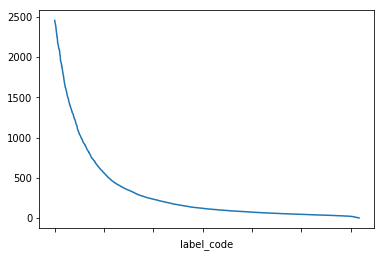

In [234]:
label_train_cnt.iloc[1000:, 0].plot()

In [235]:
label_train_cnt['ratio_max'] = label_train_cnt['ImageID'].max() / label_train_cnt['ImageID']

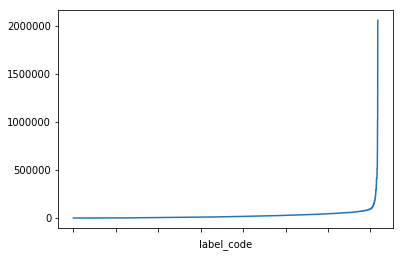

In [236]:
label_train_cnt['ratio_max'].plot()

In [237]:
label_train_cnt

,ImageID,ratio_max
label_code,,
/m/09j2d,2055515,1.000000e+00
/m/01g317,1848025,1.112277e+00
/m/07j7r,1384269,1.484910e+00
/m/0dzct,1372236,1.497931e+00
/m/09j5n,883613,2.326262e+00
/m/0d4v4,577591,3.558773e+00
/m/05s2s,576810,3.563591e+00
/m/0c9ph5,501313,4.100263e+00
/m/083wq,429990,4.780379e+00


In [238]:
label_train_cnt.index[label_train_cnt['ImageID']==1]

Index(['/m/0266h', '/m/0cvt8m', '/m/05q3k'], dtype='object', name='label_code')

In [239]:
# label_train.shape

In [240]:
# label_train.loc[label_train['Confidence_mch'].isnull(), 'label_code'].nunique()
# label_train.loc[:, 'label_code'].nunique()

In [241]:
# label_train.head()

In [242]:
# label_train['Confidence_mch'].std()

In [243]:
# t = pd.merge(left=label_hmn_train[~label_hmn_train['label_code'].duplicated()], \
#              right=label_mch_train[~label_mch_train['label_code'].duplicated()], \
#              on='label_code', how='inner')
# t.shape

In [244]:
label_tun = pd.read_csv('../input/tuning_labels.csv', names=['id', 'labels'], index_col='id')

In [245]:
label_tun.head()

,labels
id,
2b2f44594449326f4e52553d,/m/06ts_6 /m/01g317
2b333057383432514454593d,/m/01g317 /m/06ts_6 /m/01jpn4 /m/0dnkv
2b38364476612f6c4558383d,/m/01g317 /m/05zp8
2b4270756237642b7456453d,/m/0jjw /m/015r61 /m/02csf /m/05qdh
2b4534307571444f412b4d3d,/m/099fz


In [246]:
pop_labels_tun = label_tun['labels'].str.split().apply(pd.Series).stack().value_counts().head(10).index.tolist()

In [247]:
pop_labels_trn = label_train_0_cnt.head(10)['label_code'].tolist()

In [248]:
pop_labels_trn

['/m/01g317',
 '/m/09j2d',
 '/m/0dzct',
 '/m/07j7r',
 '/m/05s2s',
 '/m/07yv9',
 '/m/0cgh4',
 '/m/01prls',
 '/m/0c9ph5',
 '/m/0jbk']

In [249]:
[label2desc_train.loc[ii, 'description'] for ii in pop_labels_tun]

['Person',
 'Plant',
 'Tree',
 'Street',
 'Wood',
 'Bicycle',
 'Drawing',
 'Property',
 'Art',
 'Glasses']

In [250]:
[label2desc_train.loc[ii, 'description'] for ii in pop_labels_trn]

['Person',
 'Clothing',
 'Human face',
 'Tree',
 'Plant',
 'Vehicle',
 'Building',
 'Land vehicle',
 'Flower',
 'Animal']

In [251]:
label_tun.shape

(1000, 1)

In [252]:
from matplotlib import pyplot as plt
import cv2

In [253]:
label_hmn_6 = ['000002b66c9c498e', '000002b97e5471a0', '000002c707c9895e', '0000048549557964', '000004f4400f6ec5', '0000071d71a0a6f6']

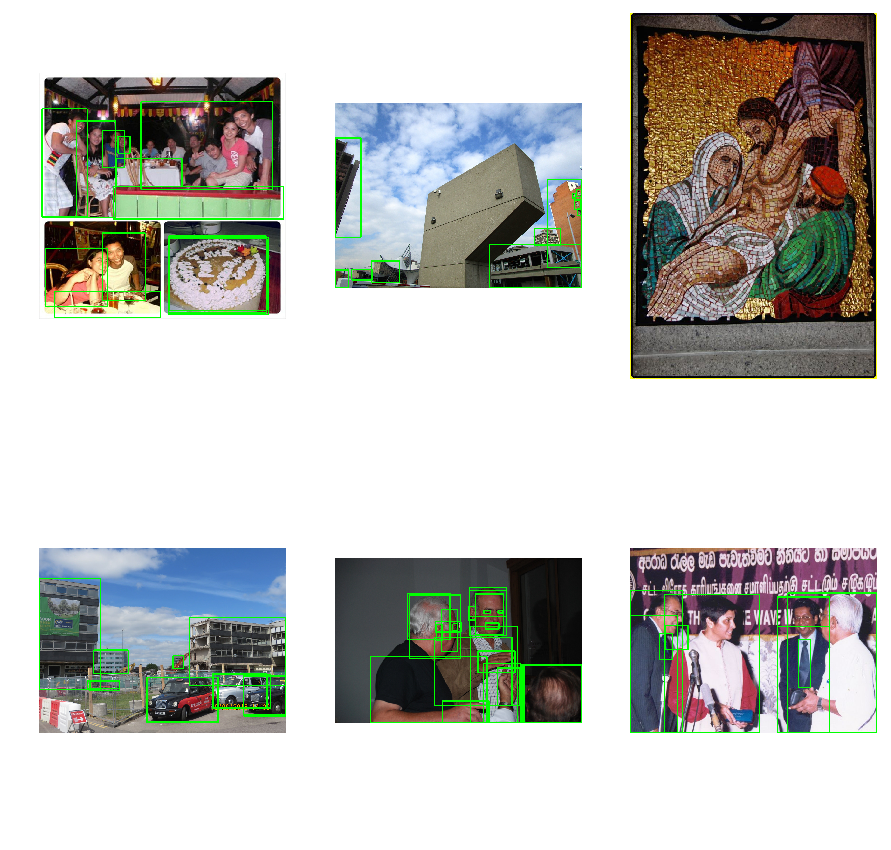

In [254]:
fig, ax = plt.subplots()
fig.set_size_inches((15, 15))
ax.set_axis_off()
n = 0
for row in label_hmn_6:
    a = fig.add_subplot(2, 3, n+1)
    img = plt.imread('../input/train_images/train_all/'+row+'.jpg')
    box = bbox_train[bbox_train['ImageID'] == row]
    h, w = img.shape[:2]
    for idx, row in box.iterrows():
        img = cv2.rectangle(img, (int(row.XMin*w), int(row.YMin*h)), (int(row.XMax*w), int(row.YMax*h)), (0,255,0), 4)
#     label = class_desc.loc[class_desc['image_id'] == row[0], 'Description'].str.cat(sep=',')
#     plt.title(label, fontsize=10)
    plt.axis('off')
    plt.imshow(img)
    n += 1

            description  Confidence   source
6098052        Clothing         1.0    human
6098053          Person         1.0    human
6098054      Human face         1.0    human
7170744      Human face         1.0     bbox
7827426      Human face         1.0     bbox
7863034      Human face         1.0     bbox
8056522      Human face         1.0     bbox
8209507      Human face         1.0     bbox
8447620      Human face         1.0     bbox
8550640      Human face         1.0     bbox
8738430      Human face         1.0     bbox
8803332      Human face         1.0     bbox
8923154      Human face         1.0     bbox
9044389      Human face         1.0     bbox
9076676      Human face         1.0     bbox
9150780      Human face         1.0     bbox
9280748      Human face         1.0     bbox
9330975      Human face         1.0     bbox
9548191      Human face         1.0     bbox
9758011      Human face         1.0     bbox
10047807     Human face         1.0     bbox
10094299  

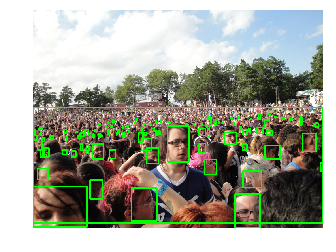

In [255]:
row = 'd13f02d0775b1c6d'
print(label_train_.loc[label_train_.ImageID == row, ['description','Confidence', 'source']])
img = plt.imread('../input/train_images/train_all/'+row+'.jpg')
box = bbox_train[bbox_train['ImageID'] == row]
h, w = img.shape[:2]
for idx, row in box.iterrows():
#     if row.description == 'Human ear':
        img = cv2.rectangle(img, (int(row.XMin*w), int(row.YMin*h)), (int(row.XMax*w), int(row.YMax*h)), (0,255,0), 4)
        print(row['description'])
plt.axis('off')
plt.imshow(img)

In [256]:
h, w

(768, 1024)